Test with radial bases function and make its variation through anistropic shape parameters and spherical harmonics

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def rbf(x, kc, ks):
    """
        Inputs:
            x: (h, w, d)
            kc: (1, 1, d)
            ks: (1, 1, d, d)
        Outputs:
            (..., k)
    """
    offset = x[..., :] - kc  # (n, d)
    out = 1 / (1 + ((offset[..., None] * ks).sum(-2) * offset).sum(-1))
    return out, offset
    
def rbf_ch(x, kc, ks, kch):
    """
        Inputs:
            x: (h, w, d)
            kc: (1, 1, d)
            ks: (1, 1, d, d)
            kch: (1, 1, ch_d)
        Outputs:
            (..., k)
    """
    offset = x[..., :] - kc  # (n, d)
    theta = np.arctan2(offset[..., 1], offset[..., 0])
    out = 1 / (1 + ((offset[..., None] * ks).sum(-2) * offset).sum(-1))
    out = out * (1 + kch[..., 0] * np.cos(theta) + kch[...,1] * np.sin(theta))
    
    return out, offset

In [2]:
# parameter information of target plots
c = np.array([0, 0])
c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = c9 = c10 = c11 = c12 = c13 = c14 = c15 = c16 = c17 = c18 = c
s1 = np.array([[0.7, 0],[0, 0.7]])
s2 = np.array([[0.5, 0.3],[0.3, 1.5]])
s3 = np.array([[0.2, -0.4],[-0.4, 2.0]])
s4 = s5 = s6 = np.array([[0.5, -0.3],[-0.3, 1.5]])
s7 = s8 = s9 = np.array([[0.7, 0],[0, 0.7]])
s10 = s11 = s12 = np.array([[0.7, 0],[0, 0.7]])
s13 = s14 = s15 = np.array([[0.5, -0.3],[-0.3, 1.5]])
s16 = s17 = s18 = np.array([[0.5, -0.3],[-0.3, 1.5]])

ch1 = np.array([-1., 1.])
ch2 = np.array([-1., 1.])
ch3 = np.array([-1., 1.])

func_params = ['rbf', 'rbf_mfs', 'rbf_ch_circle', 'rbf_ch_mfs_circle']
c_params = np.stack([c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12], axis=0)
s_params = np.stack([s1, s2, s3, s1, s2, s3, s1, s2, s3, s1, s2, s3], axis=0)
freq_params = [0, 0, 0, 2**4, 2**4, 2**4, 0, 0, 0, 2**4, 2**4, 2**4]
ch_params = [None, None, None, None, None, None, ch1, ch2, ch3, ch1, ch2, ch3]
n_plot = 12

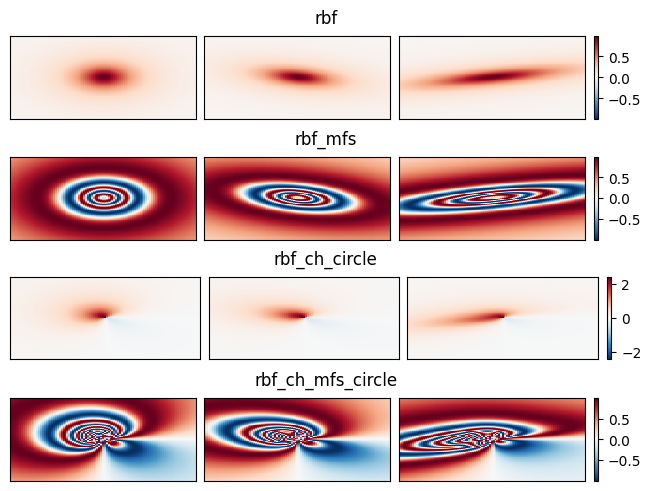

In [3]:
# generate 2 2d grids for the x & y bounds
y, x = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xy = np.stack([x, y], axis=-1)

n_row = 4
n_col = 3
fig = plt.figure(constrained_layout=True)
subfigs = fig.subfigures(n_row, 1)
for row, subfig in enumerate(subfigs):
    func = func_params[row % n_row]
    subfig.suptitle(func)
    axes = subfig.subplots(nrows=1, ncols=n_col)
    for col, ax in enumerate(axes):
        idx = (row * n_col + col) % n_plot
        kc = c_params[idx]
        ks = s_params[idx]
        
        if func == 'rbf':
            z, _ = rbf(xy, kc[None, None, :], ks[None, None, :, :])
        elif func == 'rbf_mfs':
            freq = freq_params[idx]
            z, _ = rbf(xy, kc[None, None, :], ks[None, None, :, :])
            z = np.sin(z * freq)
        elif 'rbf_ch_mfs' in func:
            kch = ch_params[idx]
            freq = freq_params[idx]
            z, _ = rbf_ch(xy, kc[None, None, :], ks[None, None, :, :], kch[None, None, :])
            z = np.sin(z * freq)
        elif 'rbf_ch' in func:
            kch = ch_params[idx]
            z, _ = rbf_ch(xy, kc[None, None, :], ks[None, None, :, :], kch[None, None, :])
        else:
            raise NotImplementedError
            
        # x and y are bounds, so z should be the value *inside* those bounds.
        # Therefore, remove the last value from the z array.
        z = z[:-1, :-1]
        z_min, z_max = -np.abs(z).max(), np.abs(z).max()
        
        c = ax.pcolormesh(x, y, z, cmap='RdBu_r', vmin=z_min, vmax=z_max)
        # set the limits of the plot to the limits of the data
        #ax.axis([x.min(), x.max(), y.min(), y.max()])
        ax.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
        if col == n_col -1:
            fig.colorbar(c, ax=ax)

plt.show()